In [29]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Sample data
data = pd.read_csv('data/web_data/matching_result_prop_significatif.csv')

# Create DataFrame
df = pd.DataFrame(data)
df['group'] = ['control' if i % 2 == 0 else 'treated' for i in range(len(df))]
display(df)

control_df = df[df['group']=='control'].reset_index(drop=True)
treated_df = df[df['group']=='treated'].reset_index(drop=True)


display(control_df)
display(treated_df)

,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated
2,0.112116,0.108776,0.115455,control
3,0.124220,0.120728,0.127711,treated
4,0.112347,0.108748,0.115946,control
5,0.121475,0.117752,0.125198,treated
6,0.110081,0.105839,0.114322,control
7,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.112116,0.108776,0.115455,control
2,0.112347,0.108748,0.115946,control
3,0.110081,0.105839,0.114322,control


,proportion_influenced,ci_lower,ci_upper,group
0,0.117838,0.114045,0.121630,treated
1,0.124220,0.120728,0.127711,treated
2,0.121475,0.117752,0.125198,treated
3,0.130825,0.126256,0.135395,treated


In [36]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

# Sample data
data = pd.read_csv('data/web_data/matching_result_prop_significatif.csv')

# Create DataFrame
df = pd.DataFrame(data)
df['group'] = ['control' if i % 2 == 0 else 'treated' for i in range(len(df))]
display(df)

control_df = df[df['group']=='control'].reset_index(drop=True)
treated_df = df[df['group']=='treated'].reset_index(drop=True)

display(control_df)
display(treated_df)

pair1 = pd.DataFrame((control_df.loc[0], treated_df.loc[0])).reset_index(drop=True)
display(pair1)

pair2 = pd.DataFrame((control_df.loc[1], treated_df.loc[1])).reset_index(drop=True)
display(pair2)

# Adjusting traces for vertical orientation
trace_pair_1 = go.Scatter(
    x=pair1.index,
    y=pair1['proportion_influenced'],
    mode='markers',
    name='25th percentile',
    marker=dict(color='blue', size=10),
    text=pair1.index,
    error_y=dict(type='data', array=pair1['ci_upper'] - pair1['proportion_influenced'], color='blue', thickness=1.5)
)

trace_pair_2 = go.Scatter(
    x=pair2.index,
    y=pair2['proportion_influenced'],
    mode='markers',
    name='Median',
    marker=dict(color='orange', size=10),
    text=pair2.index,
    error_y=dict(type='data', array=pair2['ci_upper'] - pair2['proportion_influenced'], color='orange', thickness=1.5)
)

# Creating the figure with all traces
fig = go.Figure(data=[trace_pair_1, trace_pair_2])

# Set the initial visibility to show control data only
fig.data[0].visible = True
fig.data[1].visible = False

# Updating layout with interactive buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,  # 'Control' is active initially
            x=1,
            y=1,
            buttons=list([
                dict(label="25th percentile",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"yaxis.range": [0, 0.25],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Median",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"yaxis.range": [0, 0.25],
                            "xaxis.title.text": 'Group'}]),
            ]),
        )
    ],
    xaxis=dict(title='Group', showgrid=False, showline=True, linewidth=1, linecolor='white'),
    yaxis=dict(title='Proportion Influenced', showgrid=False, showline=True, linewidth=1, linecolor='white')
)

# Show the figure
fig.show(config={'displayModeBar': False})


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated
2,0.112116,0.108776,0.115455,control
3,0.124220,0.120728,0.127711,treated
4,0.112347,0.108748,0.115946,control
5,0.121475,0.117752,0.125198,treated
6,0.110081,0.105839,0.114322,control
7,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.112116,0.108776,0.115455,control
2,0.112347,0.108748,0.115946,control
3,0.110081,0.105839,0.114322,control


,proportion_influenced,ci_lower,ci_upper,group
0,0.117838,0.114045,0.121630,treated
1,0.124220,0.120728,0.127711,treated
2,0.121475,0.117752,0.125198,treated
3,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.112116,0.108776,0.115455,control
1,0.124220,0.120728,0.127711,treated


In [48]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

# Sample data
data = pd.read_csv('data/web_data/matching_result_prop_significatif.csv')

# Create DataFrame
df = pd.DataFrame(data)
df['group'] = ['control' if i % 2 == 0 else 'treated' for i in range(len(df))]
display(df)

control_df = df[df['group']=='control'].reset_index(drop=True)
treated_df = df[df['group']=='treated'].reset_index(drop=True)

display(control_df)
display(treated_df)

percentile25 = pd.DataFrame((control_df.loc[0], treated_df.loc[0])).reset_index(drop=True)
median= pd.DataFrame((control_df.loc[1], treated_df.loc[1])).reset_index(drop=True)
percentile75 = pd.DataFrame((control_df.loc[2], treated_df.loc[2])).reset_index(drop=True)
percentile90= pd.DataFrame((control_df.loc[3], treated_df.loc[3])).reset_index(drop=True)

# Adjusting traces for vertical orientation
trace_pair_1 = go.Scatter(
    x=percentile25.index,
    y=percentile25['proportion_influenced'],
    mode='markers',
    name='25th percentile',
    marker=dict(color='blue', size=10),
    text=percentile25.index,
    error_y=dict(type='data', array=percentile25['ci_upper'] - percentile25['proportion_influenced'], color='blue', thickness=1.5)
)

trace_pair_2 = go.Scatter(
    x=median.index,
    y=median['proportion_influenced'],
    mode='markers',
    name='Median',
    marker=dict(color='blue', size=10),
    text=median.index,
    error_y=dict(type='data', array=median['ci_upper'] - median['proportion_influenced'], color='blue', thickness=1.5)
)

# Adjusting traces for vertical orientation
trace_pair_3 = go.Scatter(
    x=percentile75.index,
    y=percentile75['proportion_influenced'],
    mode='markers',
    name='75th percentile',
    marker=dict(color='blue', size=10),
    text=percentile75.index,
    error_y=dict(type='data', array=percentile75['ci_upper'] - percentile75['proportion_influenced'], color='blue', thickness=1.5)
)

# Adjusting traces for vertical orientation
trace_pair_4 = go.Scatter(
    x=percentile90.index,
    y=percentile90['proportion_influenced'],
    mode='markers',
    name='90th percentile',
    marker=dict(color='blue', size=10),
    text=percentile90.index,
    error_y=dict(type='data', array=percentile90['ci_upper'] - percentile90['proportion_influenced'], color='blue', thickness=1.5)
)

# Creating the figure with all traces
fig = go.Figure(data=[trace_pair_1, trace_pair_2, trace_pair_3, trace_pair_4])

# Set the initial visibility to show control data only
fig.data[0].visible = True
fig.data[1].visible = False

# Updating layout with interactive buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,  # 'Control' is active initially
            x=1,
            y=1,
            buttons=list([
                dict(label="25th percentile",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"yaxis.range": [0.09 , 0.13],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Median",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"yaxis.range": [0.09 , 0.13], 
                            "xaxis.title.text": 'Group'}]),
                dict(label="75th percentile",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"yaxis.range": [0.09 , 0.13],
                            "xaxis.title.text": 'Group'}]),
                dict(label="90th percentile",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"yaxis.range": [0.09 , 0.13], 
                            "xaxis.title.text": 'Group'}]),
            ]),
        )
    ],
    xaxis=dict(
        title='Group',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='white',
        tickvals=[0, 1],  # Set tick positions
        ticktext=['control', 'treated']  # Set tick labels
    ),
    yaxis=dict(
        title='Proportion Influenced',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        dtick=0.01  # Set dtick for finer graduation
    ),
    width=600  # Set the width of the figure
)

# Show the figure
fig.show(config={'displayModeBar': False})


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated
2,0.112116,0.108776,0.115455,control
3,0.124220,0.120728,0.127711,treated
4,0.112347,0.108748,0.115946,control
5,0.121475,0.117752,0.125198,treated
6,0.110081,0.105839,0.114322,control
7,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.112116,0.108776,0.115455,control
2,0.112347,0.108748,0.115946,control
3,0.110081,0.105839,0.114322,control


,proportion_influenced,ci_lower,ci_upper,group
0,0.117838,0.114045,0.121630,treated
1,0.124220,0.120728,0.127711,treated
2,0.121475,0.117752,0.125198,treated
3,0.130825,0.126256,0.135395,treated


In [57]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

# Sample data
data = pd.read_csv('data/web_data/matching_result_prop_significatif.csv')

# Create DataFrame
df = pd.DataFrame(data)
df['group'] = ['control' if i % 2 == 0 else 'treated' for i in range(len(df))]
display(df)

control_df = df[df['group']=='control'].reset_index(drop=True)
treated_df = df[df['group']=='treated'].reset_index(drop=True)

display(control_df)
display(treated_df)

percentile25 = pd.DataFrame((control_df.loc[0], treated_df.loc[0])).reset_index(drop=True)
median= pd.DataFrame((control_df.loc[1], treated_df.loc[1])).reset_index(drop=True)
percentile75 = pd.DataFrame((control_df.loc[2], treated_df.loc[2])).reset_index(drop=True)
percentile90= pd.DataFrame((control_df.loc[3], treated_df.loc[3])).reset_index(drop=True)

# Adjusting traces for vertical orientation
trace_pair_1 = go.Scatter(
    x=percentile25.index,
    y=percentile25['proportion_influenced'],
    mode='markers',
    name='25th percentile',
    marker=dict(color='blue', size=10),
    text=percentile25.index,
    error_y=dict(type='data', array=percentile25['ci_upper'] - percentile25['proportion_influenced'], color='blue', thickness=1.5)
)

trace_pair_2 = go.Scatter(
    x=median.index,
    y=median['proportion_influenced'],
    mode='markers',
    name='Median',
    marker=dict(color='orange', size=10),
    text=median.index,
    error_y=dict(type='data', array=median['ci_upper'] - median['proportion_influenced'], color='orange', thickness=1.5)
)

trace_pair_3 = go.Scatter(
    x=percentile75.index,
    y=percentile75['proportion_influenced'],
    mode='markers',
    name='75th percentile',
    marker=dict(color='green', size=10),
    text=percentile75.index,
    error_y=dict(type='data', array=percentile75['ci_upper'] - percentile75['proportion_influenced'], color='green', thickness=1.5)
)

trace_pair_4 = go.Scatter(
    x=percentile90.index,
    y=percentile90['proportion_influenced'],
    mode='markers',
    name='90th percentile',
    marker=dict(color='red', size=10),
    text=percentile90.index,
    error_y=dict(type='data', array=percentile90['ci_upper'] - percentile90['proportion_influenced'], color='red', thickness=1.5)
)

# Creating the figure with all traces
fig = go.Figure(data=[trace_pair_1, trace_pair_2, trace_pair_3, trace_pair_4])

# Set the initial visibility to show control data only
fig.data[0].visible = True
fig.data[1].visible = False
fig.data[2].visible = False
fig.data[3].visible = False

# Updating layout with interactive buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,  # '25th percentile' is active initially
            x=1,
            y=1.2,
            buttons=list([
                dict(label="25th percentile",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Median",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="75th percentile",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="90th percentile",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"yaxis.range": [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
            ]),
        )
    ],
    xaxis=dict(
        title='Group',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        tickvals=[0, 1],  # Set tick positions
        ticktext=['control', 'treated']  # Set tick labels
    ),
    yaxis=dict(
        title='Proportion Influenced',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        dtick=0.005  # Set dtick for finer graduation
    ),
    width=550  # Set the width of the figure
)

# Show the figure
fig.show(config={'displayModeBar': False})


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated
2,0.112116,0.108776,0.115455,control
3,0.124220,0.120728,0.127711,treated
4,0.112347,0.108748,0.115946,control
5,0.121475,0.117752,0.125198,treated
6,0.110081,0.105839,0.114322,control
7,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.112116,0.108776,0.115455,control
2,0.112347,0.108748,0.115946,control
3,0.110081,0.105839,0.114322,control


,proportion_influenced,ci_lower,ci_upper,group
0,0.117838,0.114045,0.121630,treated
1,0.124220,0.120728,0.127711,treated
2,0.121475,0.117752,0.125198,treated
3,0.130825,0.126256,0.135395,treated


In [60]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

# Sample data
data = pd.read_csv('data/web_data/matching_result_prop_significatif.csv')

# Create DataFrame
df = pd.DataFrame(data)
df['group'] = ['control' if i % 2 == 0 else 'treated' for i in range(len(df))]
display(df)

control_df = df[df['group']=='control'].reset_index(drop=True)
treated_df = df[df['group']=='treated'].reset_index(drop=True)

display(control_df)
display(treated_df)

percentile25 = pd.DataFrame((control_df.loc[0], treated_df.loc[0])).reset_index(drop=True)
median= pd.DataFrame((control_df.loc[1], treated_df.loc[1])).reset_index(drop=True)
percentile75 = pd.DataFrame((control_df.loc[2], treated_df.loc[2])).reset_index(drop=True)
percentile90= pd.DataFrame((control_df.loc[3], treated_df.loc[3])).reset_index(drop=True)

# Adjusting traces for vertical orientation
trace_pair_1 = go.Scatter(
    x=percentile25.index,
    y=percentile25['proportion_influenced'],
    mode='markers',
    name='25th percentile',
    marker=dict(color='blue', size=10),
    text=percentile25.index,
    error_y=dict(type='data', array=percentile25['ci_upper'] - percentile25['proportion_influenced'], color='blue', thickness=1.5)
)

trace_pair_2 = go.Scatter(
    x=median.index,
    y=median['proportion_influenced'],
    mode='markers',
    name='Median',
    marker=dict(color='orange', size=10),
    text=median.index,
    error_y=dict(type='data', array=median['ci_upper'] - median['proportion_influenced'], color='orange', thickness=1.5)
)

trace_pair_3 = go.Scatter(
    x=percentile75.index,
    y=percentile75['proportion_influenced'],
    mode='markers',
    name='75th percentile',
    marker=dict(color='green', size=10),
    text=percentile75.index,
    error_y=dict(type='data', array=percentile75['ci_upper'] - percentile75['proportion_influenced'], color='green', thickness=1.5)
)

trace_pair_4 = go.Scatter(
    x=percentile90.index,
    y=percentile90['proportion_influenced'],
    mode='markers',
    name='90th percentile',
    marker=dict(color='red', size=10),
    text=percentile90.index,
    error_y=dict(type='data', array=percentile90['ci_upper'] - percentile90['proportion_influenced'], color='red', thickness=1.5)
)

# Creating the figure with all traces
fig = go.Figure(data=[trace_pair_1, trace_pair_2, trace_pair_3, trace_pair_4])

# Set the initial visibility to show control data only
fig.data[0].visible = True
fig.data[1].visible = False
fig.data[2].visible = False
fig.data[3].visible = False

# Updating layout with interactive buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,  # '25th percentile' is active initially
            x=1,
            y=1.2,
            buttons=list([
                dict(label="25th percentile",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Median",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="75th percentile",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="90th percentile",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"yaxis.range": [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Show All",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"yaxis.range": [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
            ]),
        )
    ],
    xaxis=dict(
        title='Group',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        tickvals=[0, 1],  # Set tick positions
        ticktext=['control', 'treated']  # Set tick labels
    ),
    yaxis=dict(
        title='Proportion Influenced',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        dtick=0.005  # Set dtick for finer graduation
    ),
    width=650,  # Set the width of the figure
    legend=dict(x=1.1, y=1.05)  # Set legend position
)

# Show the figure
fig.show(config={'displayModeBar': False})


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated
2,0.112116,0.108776,0.115455,control
3,0.124220,0.120728,0.127711,treated
4,0.112347,0.108748,0.115946,control
5,0.121475,0.117752,0.125198,treated
6,0.110081,0.105839,0.114322,control
7,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.112116,0.108776,0.115455,control
2,0.112347,0.108748,0.115946,control
3,0.110081,0.105839,0.114322,control


,proportion_influenced,ci_lower,ci_upper,group
0,0.117838,0.114045,0.121630,treated
1,0.124220,0.120728,0.127711,treated
2,0.121475,0.117752,0.125198,treated
3,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.117838,0.114045,0.121630,treated
2,0.112116,0.108776,0.115455,control
3,0.124220,0.120728,0.127711,treated
4,0.112347,0.108748,0.115946,control
5,0.121475,0.117752,0.125198,treated
6,0.110081,0.105839,0.114322,control
7,0.130825,0.126256,0.135395,treated


,proportion_influenced,ci_lower,ci_upper,group
0,0.107754,0.104107,0.111401,control
1,0.112116,0.108776,0.115455,control
2,0.112347,0.108748,0.115946,control
3,0.110081,0.105839,0.114322,control


,proportion_influenced,ci_lower,ci_upper,group
0,0.117838,0.114045,0.121630,treated
1,0.124220,0.120728,0.127711,treated
2,0.121475,0.117752,0.125198,treated
3,0.130825,0.126256,0.135395,treated


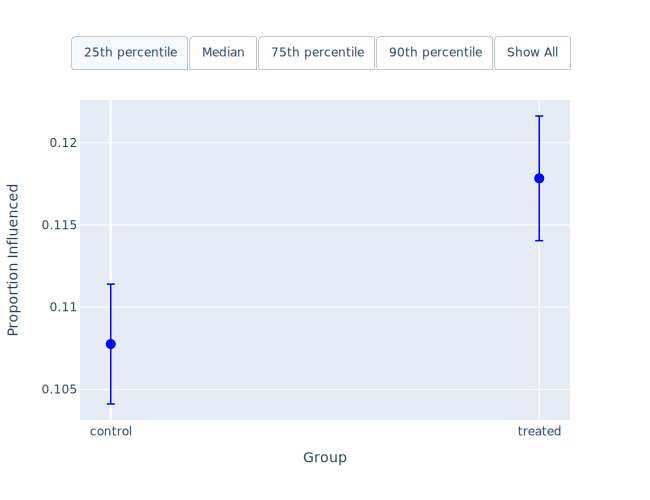

In [63]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

# Sample data
data = pd.read_csv('data/web_data/matching_result_prop_significatif.csv')

# Create DataFrame
df = pd.DataFrame(data)
df['group'] = ['control' if i % 2 == 0 else 'treated' for i in range(len(df))]
display(df)

control_df = df[df['group']=='control'].reset_index(drop=True)
treated_df = df[df['group']=='treated'].reset_index(drop=True)

display(control_df)
display(treated_df)

percentile25 = pd.DataFrame((control_df.loc[0], treated_df.loc[0])).reset_index(drop=True)
median= pd.DataFrame((control_df.loc[1], treated_df.loc[1])).reset_index(drop=True)
percentile75 = pd.DataFrame((control_df.loc[2], treated_df.loc[2])).reset_index(drop=True)
percentile90= pd.DataFrame((control_df.loc[3], treated_df.loc[3])).reset_index(drop=True)

# Adjusting traces for vertical orientation
trace_pair_1 = go.Scatter(
    x=percentile25.index,
    y=percentile25['proportion_influenced'],
    mode='markers',
    name='25th percentile',
    marker=dict(color='blue', size=10),
    text=percentile25.index,
    legendgroup='25th percentile',  # Separate legend group
    error_y=dict(type='data', array=percentile25['ci_upper'] - percentile25['proportion_influenced'], color='blue', thickness=1.5)
)

trace_pair_2 = go.Scatter(
    x=median.index,
    y=median['proportion_influenced'],
    mode='markers',
    name='Median',
    marker=dict(color='orange', size=10),
    text=median.index,
    legendgroup='Median',  # Separate legend group
    error_y=dict(type='data', array=median['ci_upper'] - median['proportion_influenced'], color='orange', thickness=1.5)
)

trace_pair_3 = go.Scatter(
    x=percentile75.index,
    y=percentile75['proportion_influenced'],
    mode='markers',
    name='75th percentile',
    marker=dict(color='green', size=10),
    text=percentile75.index,
    legendgroup='75th percentile',  # Separate legend group
    error_y=dict(type='data', array=percentile75['ci_upper'] - percentile75['proportion_influenced'], color='green', thickness=1.5)
)

trace_pair_4 = go.Scatter(
    x=percentile90.index,
    y=percentile90['proportion_influenced'],
    mode='markers',
    name='90th percentile',
    marker=dict(color='red', size=10),
    text=percentile90.index,
    legendgroup='90th percentile',  # Separate legend group
    error_y=dict(type='data', array=percentile90['ci_upper'] - percentile90['proportion_influenced'], color='red', thickness=1.5)
)

# Creating the figure with all traces
fig = go.Figure(data=[trace_pair_1, trace_pair_2, trace_pair_3, trace_pair_4])

# Set the initial visibility to show control data only
fig.data[0].visible = True
fig.data[1].visible = False
fig.data[2].visible = False
fig.data[3].visible = False

# Updating layout with interactive buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,  # '25th percentile' is active initially
            x=1,
            y=1.2,
            buttons=list([
                dict(label="25th percentile",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Median",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="75th percentile",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"yaxis.range":  [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="90th percentile",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"yaxis.range": [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
                dict(label="Show All",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"yaxis.range": [0.1, 0.15],
                            "xaxis.title.text": 'Group'}]),
            ]),
        )
    ],
    xaxis=dict(
        title='Group',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        tickvals=[0, 1],  # Set tick positions
        ticktext=['control', 'treated']  # Set tick labels
    ),
    yaxis=dict(
        title='Proportion Influenced',
        showgrid=True,
        showline=True,
        linewidth=1,
        linecolor='white',
        dtick=0.005  # Set dtick for finer graduation
    ),
    width=650,  # Set the width of the figure
    legend=dict(x=1.1, y=1.05)  # Set legend position
)

# Show the figure
fig.show(config={'displayModeBar': False})
#fig.show(renderer="svg")